# IBM HR Analytics Employee Attrition Prediction

# Exploratory Data Analysis

## By: Chris Le

## Imports

In [3]:
# Import relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# suppress future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Prepare the notebook for matplotlib and other libraries- show plots inline
%matplotlib inline

In [4]:
# Load data and set parameter index_col=0, because first column contains no useful data.
df = pd.read_csv('data/interim/IBM_HR-Employee-Attrition_cleaned.csv', index_col=0)

## Explore Data

In [5]:
# Check out data appearance
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,3,2,2,17,3,2,7,7,7,7


In [6]:
# Obtain data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [7]:
# Get basic summary statistics for each column feature
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Distribution of Features

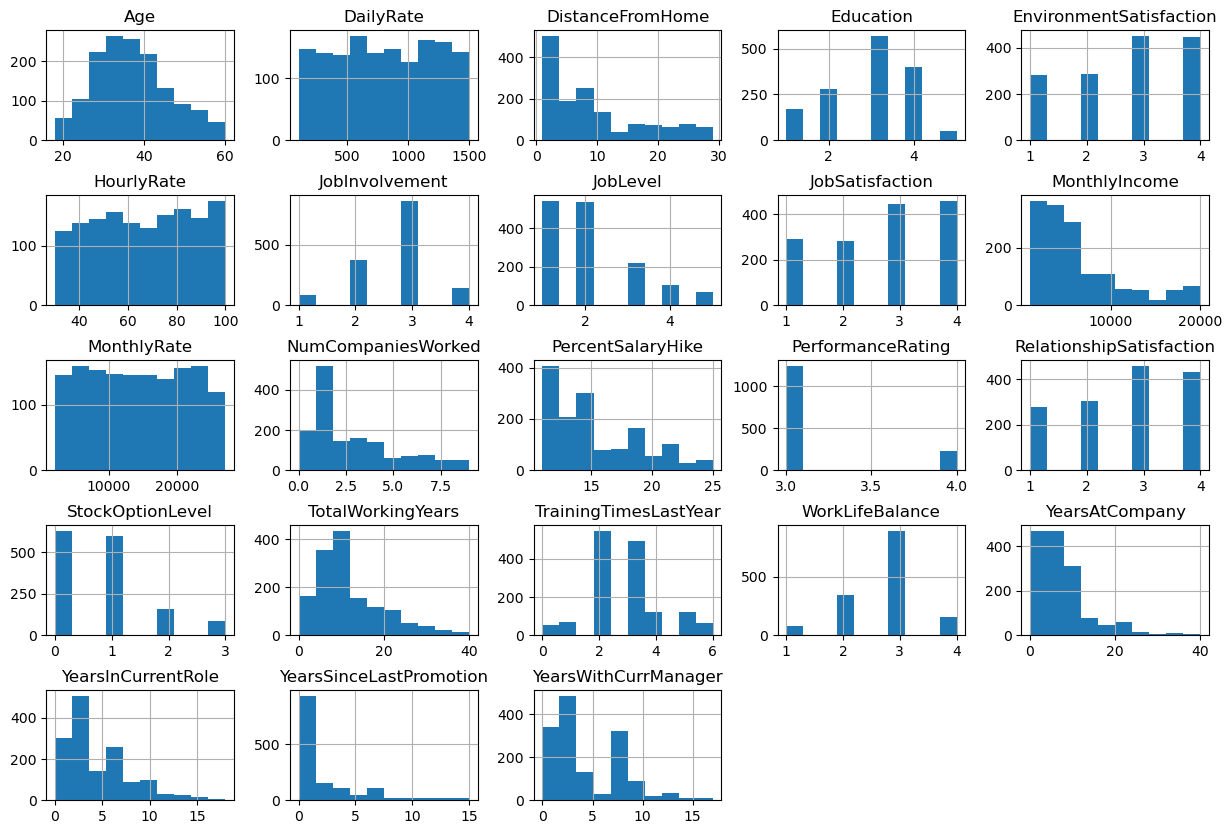

In [8]:
# Review distribution of data by viewing histrogram subplots
_ = df.hist(figsize=(15,10))
_ = plt.subplots_adjust(hspace=0.5);

Text(0.5, 1.0, 'Distribution of Employee Distances From Home')

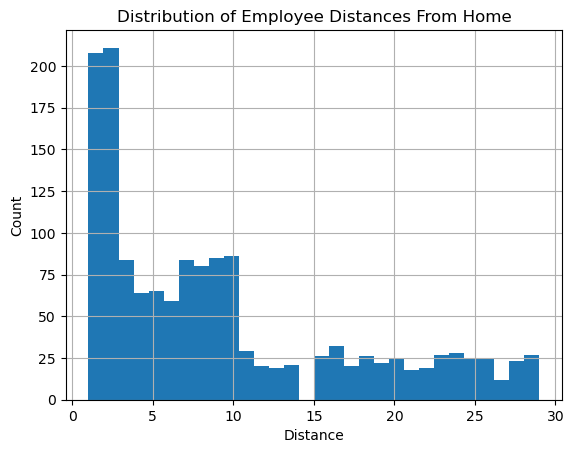

In [9]:
# Review distribution of DistanceFromHome
df.DistanceFromHome.hist(bins=30)
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Distribution of Employee Distances From Home')

Text(0.5, 1.0, 'Distribution of Employee Monthly Incomes')

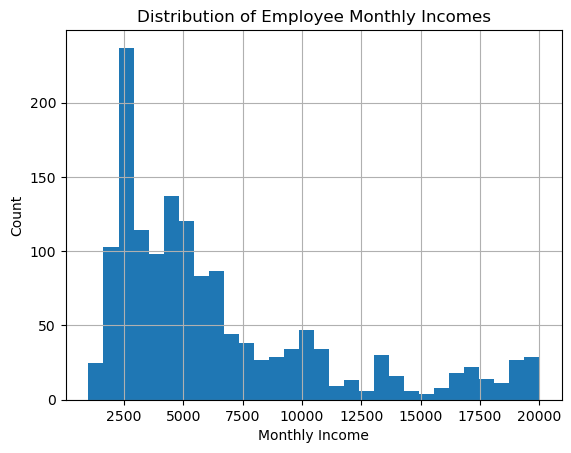

In [10]:
# Review distribution of MonthlyIncome
df.MonthlyIncome.hist(bins=30)
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.title('Distribution of Employee Monthly Incomes')

Text(0.5, 1.0, 'Distribution of Number of Companies Employees Worked At')

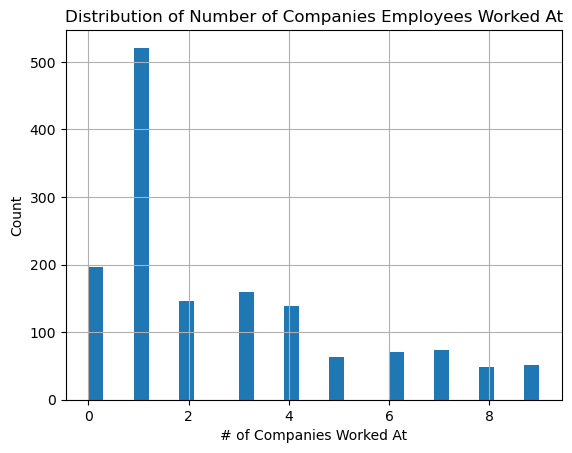

In [11]:
# Review distribution of NumCompaniesWorked
df.NumCompaniesWorked.hist(bins=30)
plt.xlabel('# of Companies Worked At')
plt.ylabel('Count')
plt.title('Distribution of Number of Companies Employees Worked At')

Text(0.5, 1.0, 'Distribution of Employee % Salary Hike')

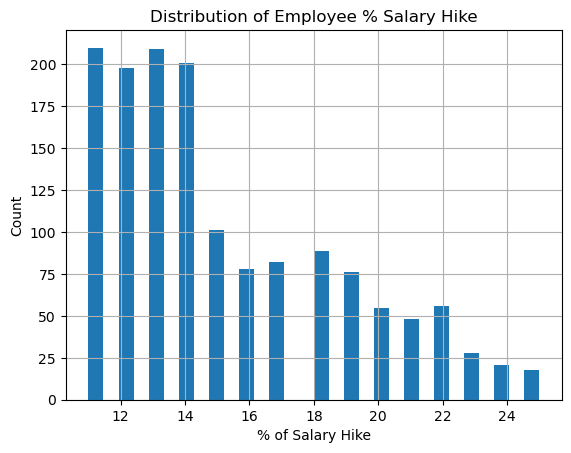

In [12]:
# Review distribution of PercentSalaryHike
df.PercentSalaryHike.hist(bins=30)
plt.xlabel('% of Salary Hike')
plt.ylabel('Count')
plt.title('Distribution of Employee % Salary Hike')

Text(0.5, 1.0, 'Distribution of Employee Performance Ratings')

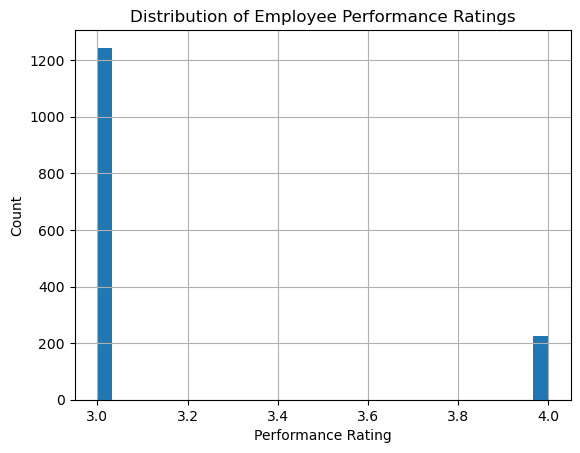

In [13]:
# Review distribution of PerformanceRating
df.PerformanceRating.hist(bins=30)
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Distribution of Employee Performance Ratings')

Text(0.5, 1.0, 'Distribution of Employee Total Working Years')

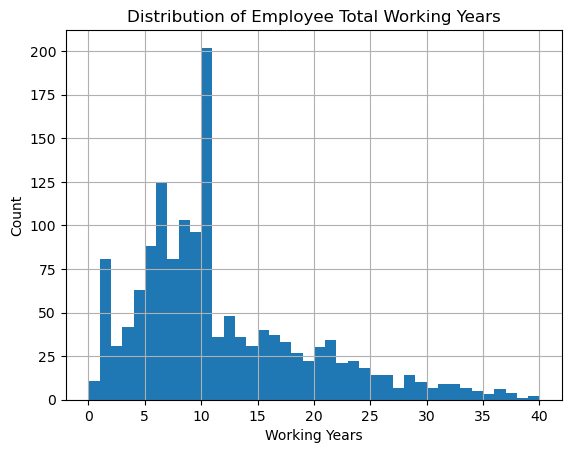

In [14]:
# Review distribution of TotalWorkingYears
df.TotalWorkingYears.hist(bins=40)
plt.xlabel('Working Years')
plt.ylabel('Count')
plt.title('Distribution of Employee Total Working Years')

Text(0.5, 1.0, 'Distribution of Employee Training Times Last Year')

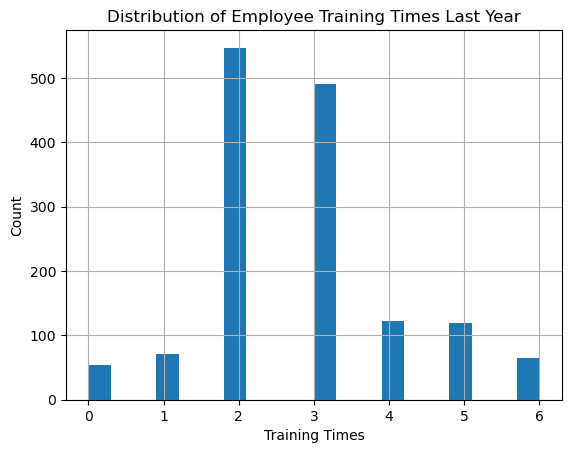

In [15]:
# Review distribution of TrainingTimesLastYear
df.TrainingTimesLastYear.hist(bins=20)
plt.xlabel('Training Times')
plt.ylabel('Count')
plt.title('Distribution of Employee Training Times Last Year')

Text(0.5, 1.0, 'Distribution of Employee Years At Company')

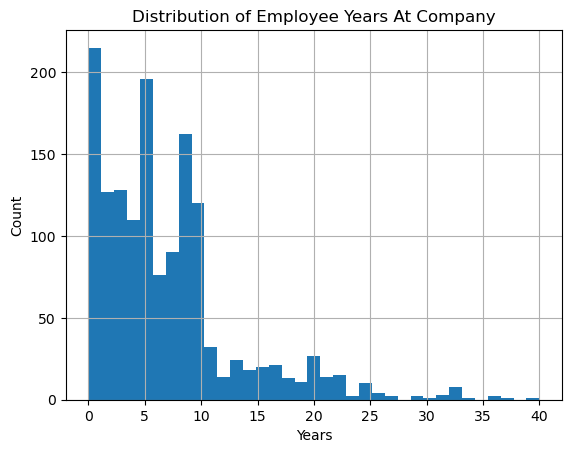

In [16]:
# Review distribution of YearsAtCompany
df.YearsAtCompany.hist(bins=35)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Distribution of Employee Years At Company')

Text(0.5, 1.0, 'Distribution of Employee Years Since Last Promotion')

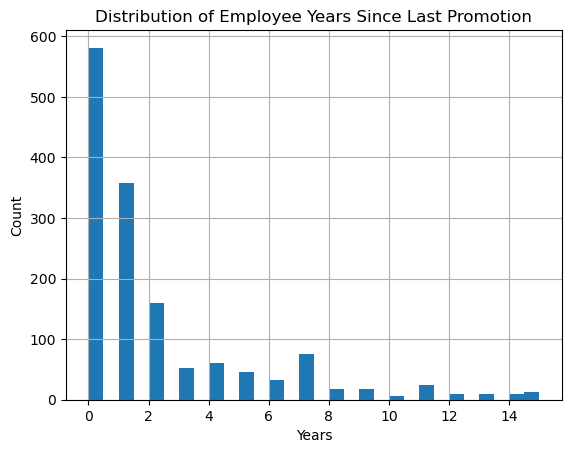

In [17]:
# Review distribution of YearsSinceLastPromotion
df.YearsSinceLastPromotion.hist(bins=30)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Distribution of Employee Years Since Last Promotion')

In [18]:
# Check proportion of classifications
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

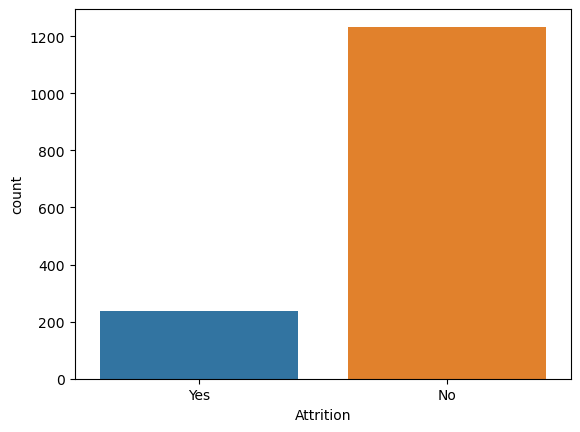

In [19]:
# Checking Attrition Class Distribution for Imbalanced Classification Problem
sns.countplot(x='Attrition', data=df)

An inspection of the number of counts of "yes" vs "no" in the attrition shows that there is a considerable class imbalance in the target variable that we may have to deal with. 

In [20]:
# Looking at Categorical Variables
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

## Feature Correlations

In [21]:
# Check out correlation of data
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


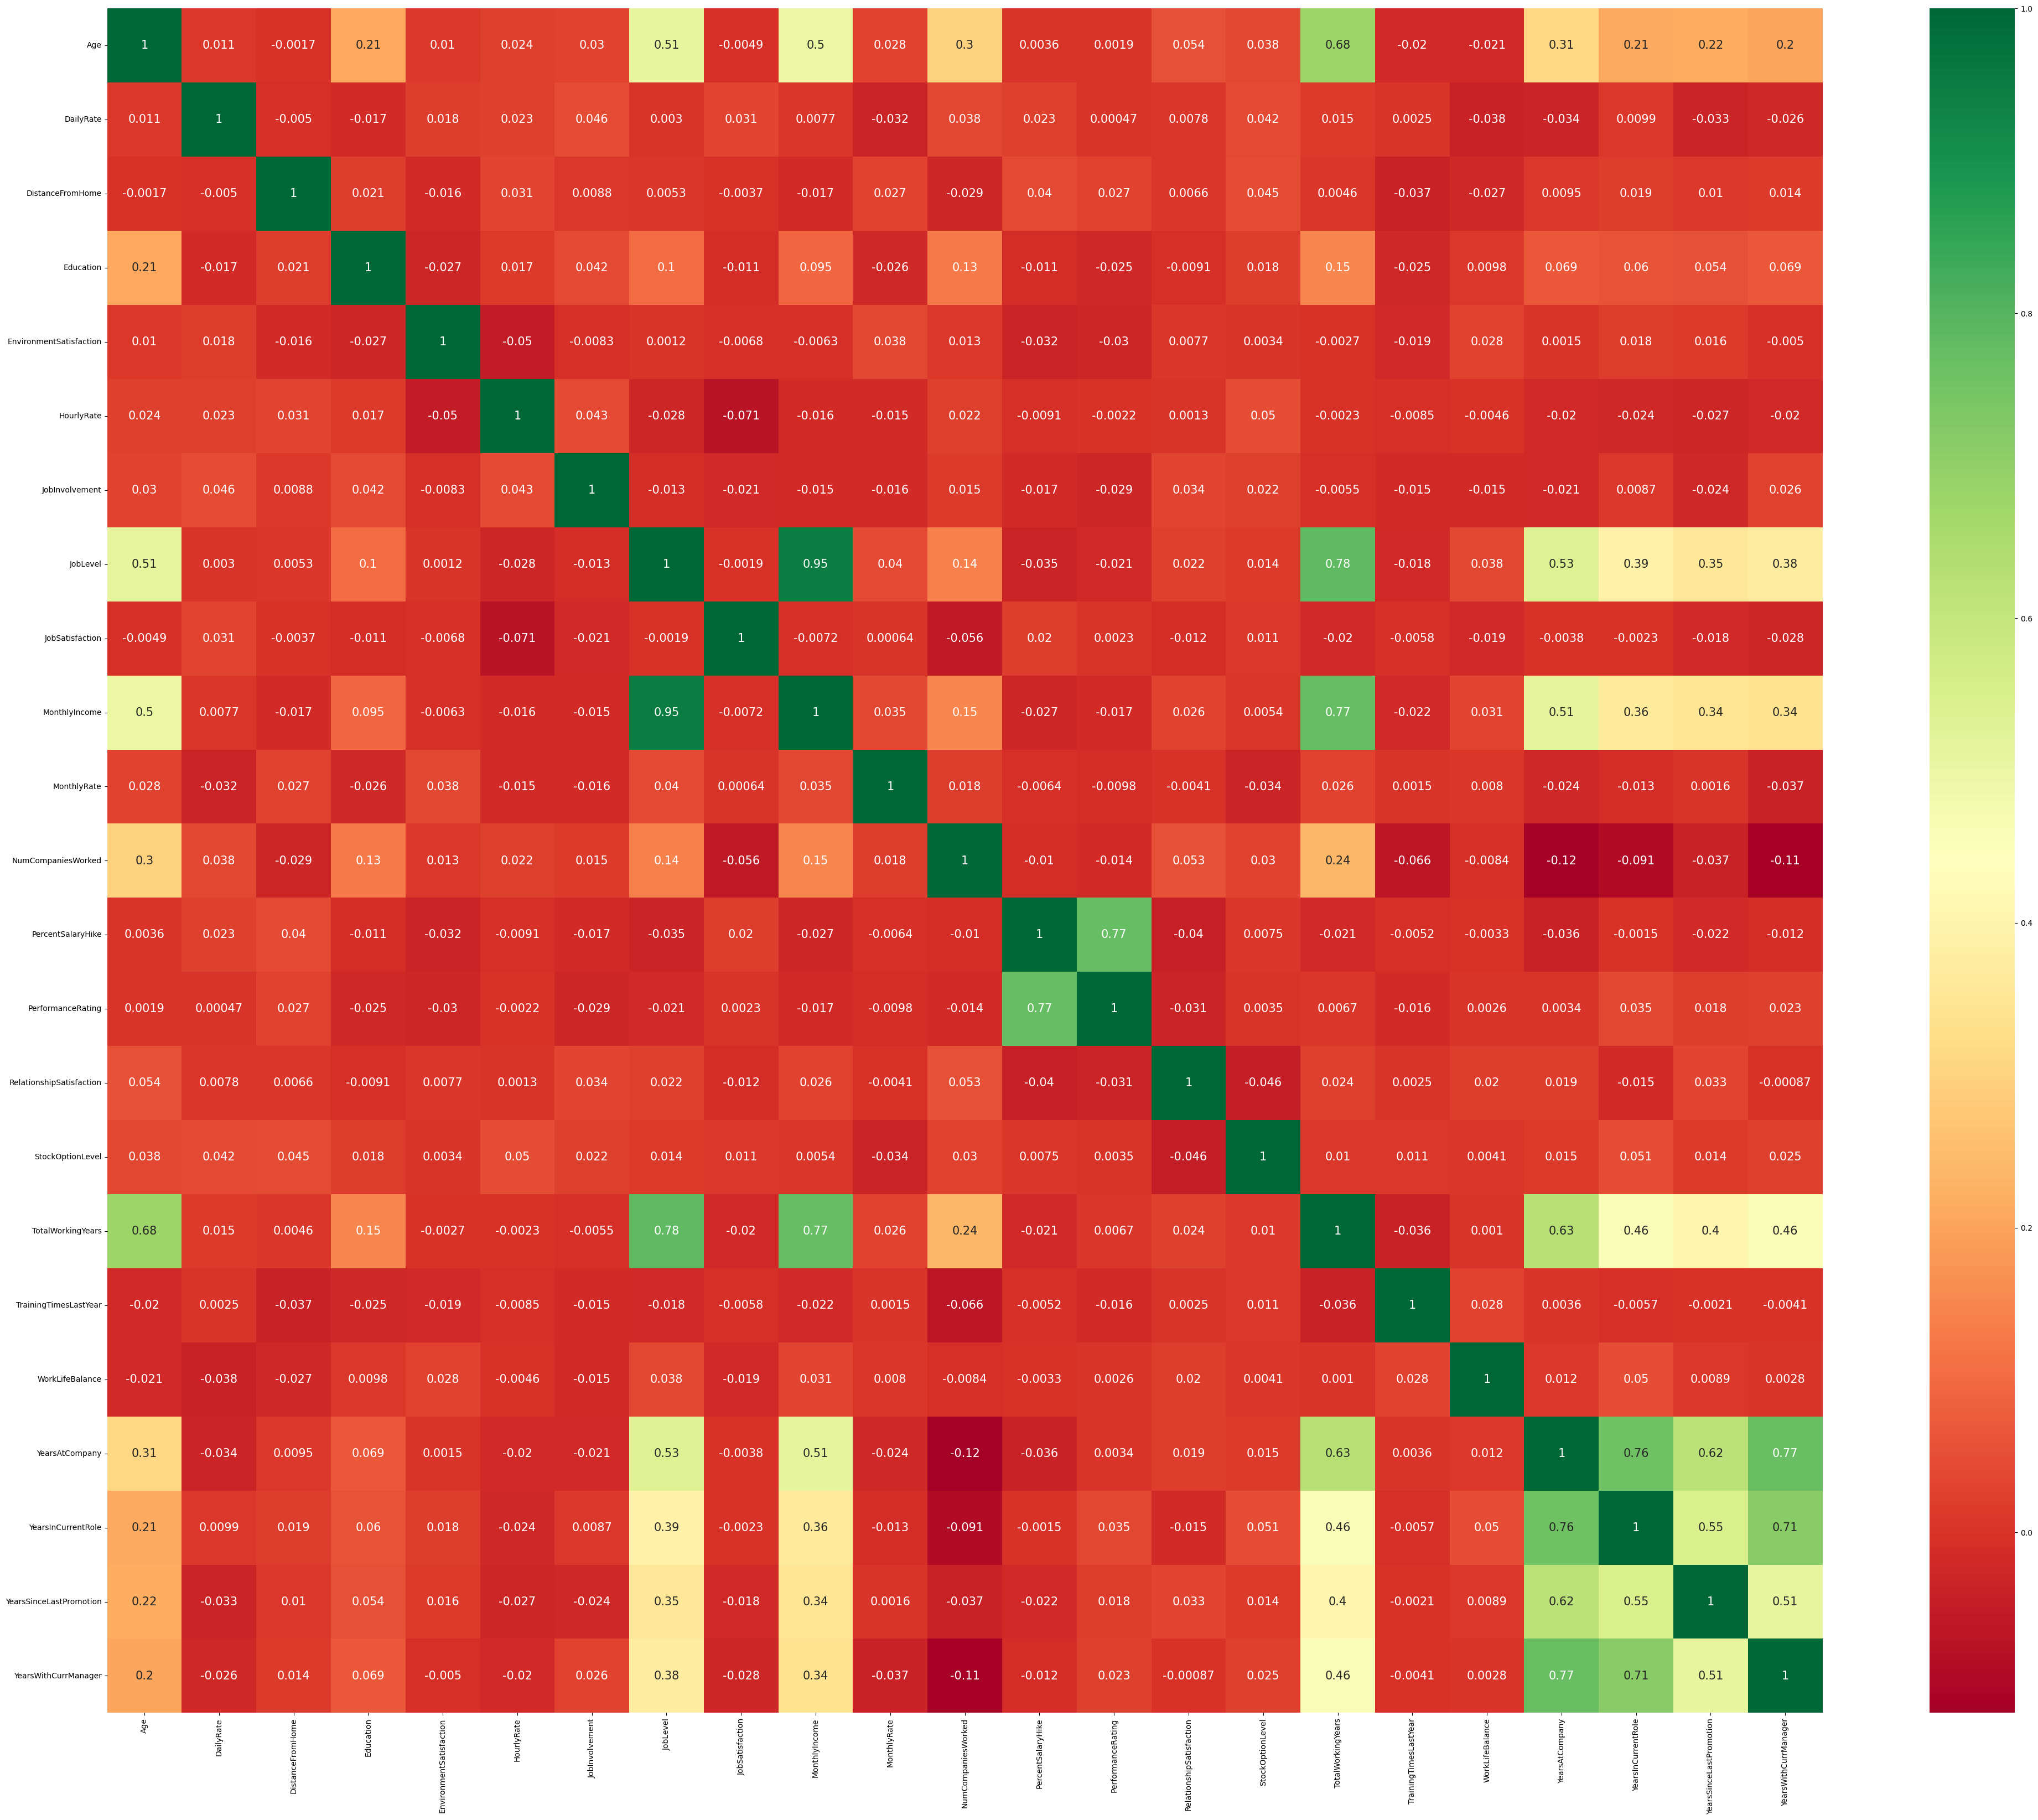

In [25]:
#Make heatmap of data to visualize correlations
_ = plt.subplots(figsize=(50, 40))
_ = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

- JobLevel is highly correlated with MonthlyIncome. 
- YearsAtCompany is highly correlated with YearsInCurrentRole, & YearsWithCurrManager.
- YearsInCurrentRole is highly associated with YearsWithCurrManager. 
- TotalWorkingYears is moderately correlated with Age, JobLevel, & MonthlyIncome. 
- PercentSalaryHike is moderately correlated with PerformanceRating.

- YearsAtCompany is negatively correlated with NumCompaniesWorked.
- JobSatisfaction is neagtively correlated with HourlyRate.

# Summary

- Initial data exploration of the distribution of numerical features using histograms showed many histograms are tail-heavy. DistanceFromHome, MonthlyIncome, and YearsAtCompany are right-skewed. So, methods to transform features to normal distribution can be considered prior to fitting model to data.
- Education, EnvironmentSatisfaction, JobInvolvement, PerformanceRating, RelationshipSatisfaction, and WorkLifeBalance are ordinal categorical features.
- Distribution of Performance Rating only shows two unique values. 
- Checking the target variable Attrition's Class Distribution showed an imbalanced class data with 16% (Yes) and 84% (No). May need to consider dealing with class imbalance prior to train/test/split, and chose of peformance metric used for model evaluation. 
- Analysis of feature correlation showed a few highly correlated features.
***

- For more in-depth data visualizations and exploration of important features related to employee attrition, please see my Tableau here:

__[IBM HR Analytics Tableau Viz](https://public.tableau.com/views/IBMEmployeeAttrition_16746138847360/IBMHRAnalytics?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)__